In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
sns.set_theme(style = "darkgrid")

In [2]:
data = pd.read_csv("C:/Users/praty/Downloads/Loan Default/Training Data.csv")
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
# Encoding categorical columns
encoder = LabelEncoder()
for col in ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']:
    data[col] = encoder.fit_transform(data[col])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Id                 252000 non-null  int64
 1   Income             252000 non-null  int64
 2   Age                252000 non-null  int64
 3   Experience         252000 non-null  int64
 4   Married/Single     252000 non-null  int32
 5   House_Ownership    252000 non-null  int32
 6   Car_Ownership      252000 non-null  int32
 7   Profession         252000 non-null  int32
 8   CITY               252000 non-null  int32
 9   STATE              252000 non-null  int32
 10  CURRENT_JOB_YRS    252000 non-null  int64
 11  CURRENT_HOUSE_YRS  252000 non-null  int64
 12  Risk_Flag          252000 non-null  int64
dtypes: int32(6), int64(7)
memory usage: 19.2 MB


In [5]:
#checking if there are any missing values
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [6]:
data.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [7]:
data.describe()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,0.897905,1.891722,0.301587,25.276746,158.137675,13.808952,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,0.302774,0.391880,0.458948,14.728537,92.201736,9.372300,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,1.000000,2.000000,0.000000,13.000000,78.000000,6.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,1.000000,2.000000,0.000000,26.000000,157.000000,14.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,1.000000,2.000000,1.000000,38.000000,238.000000,22.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,316.000000,28.000000,14.000000,14.000000,1.000000


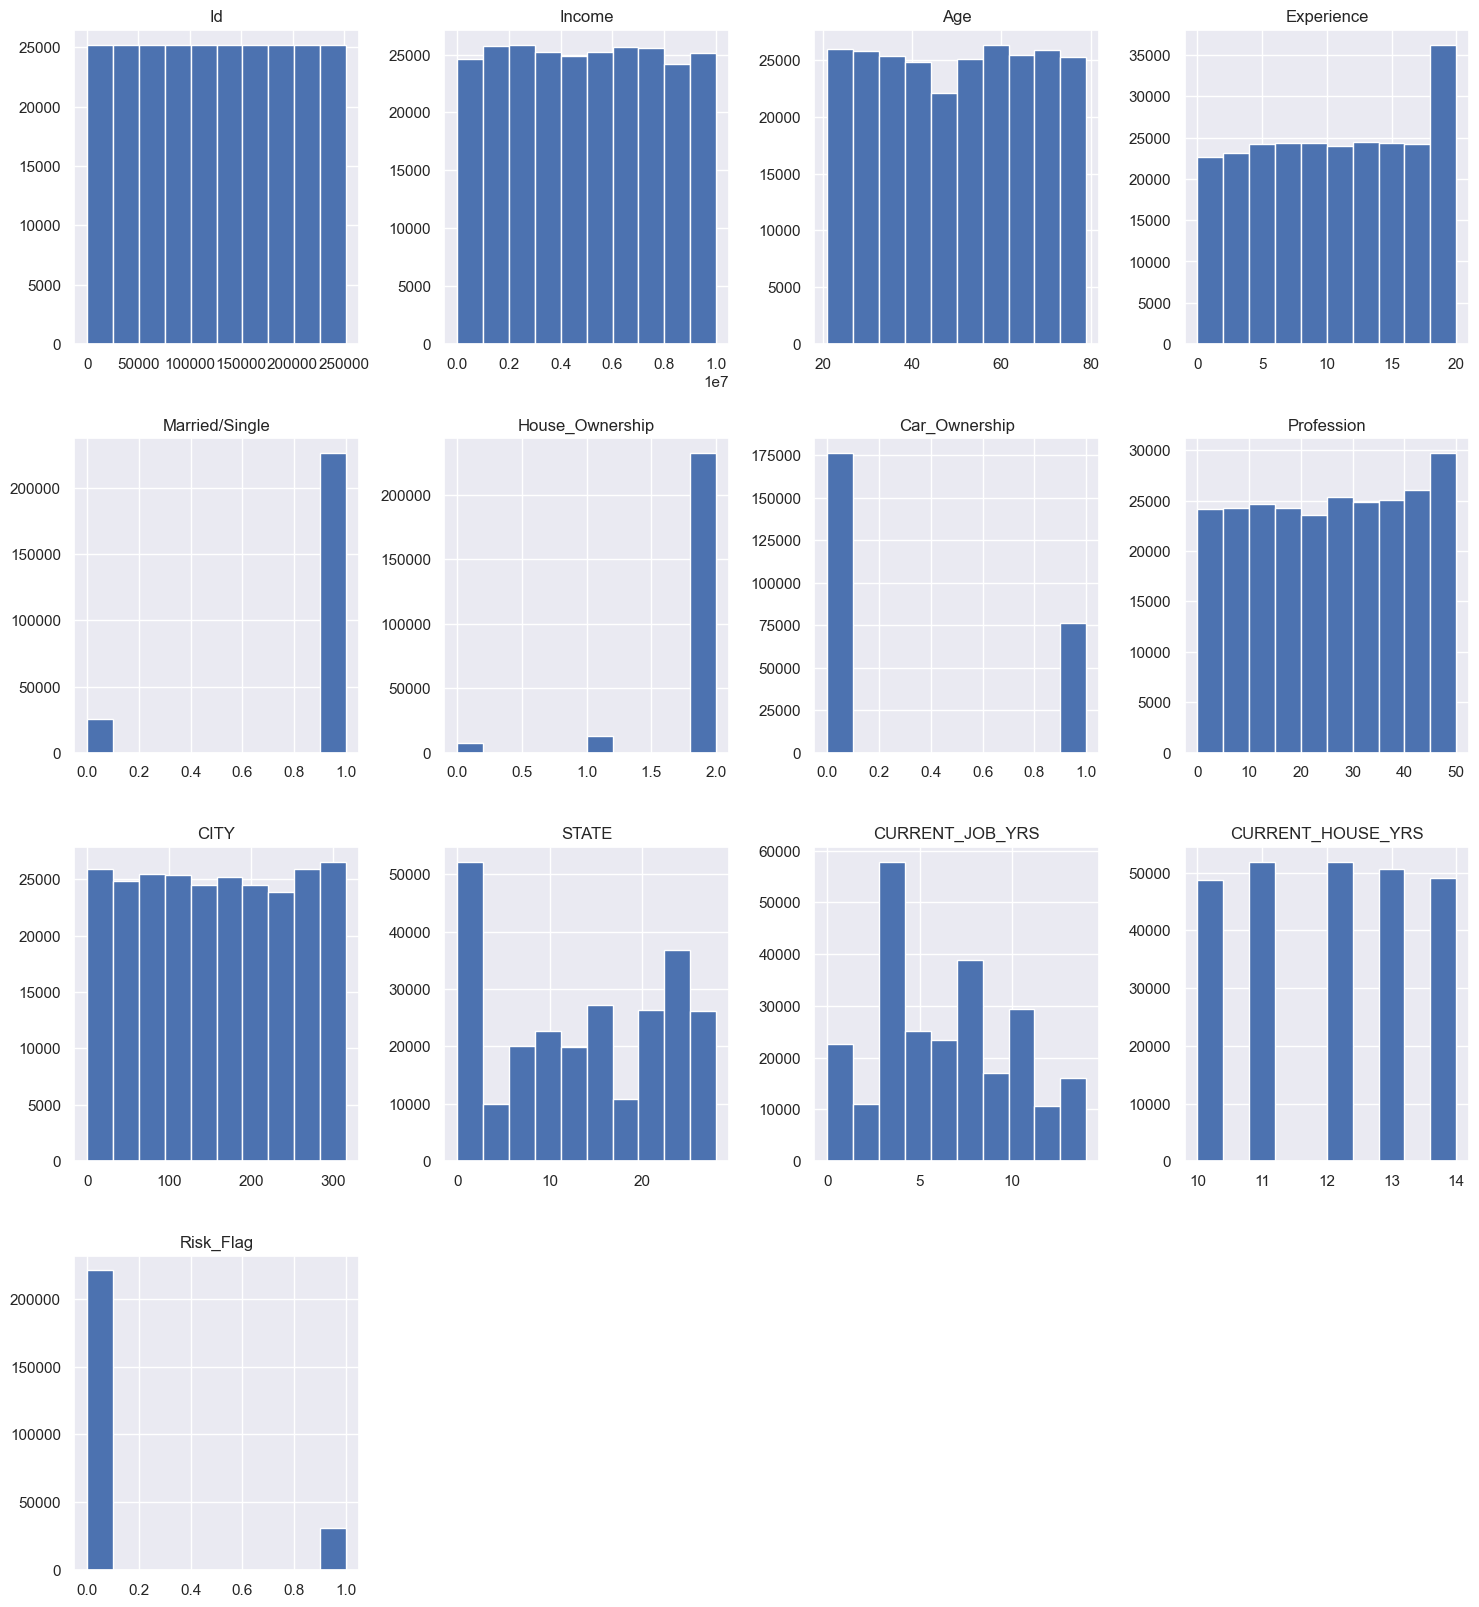

In [8]:
#checking the data distrbution
data.hist( figsize = (18, 20) )
plt.show()

In [9]:
#checking the count of the target variable
data["Risk_Flag"].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

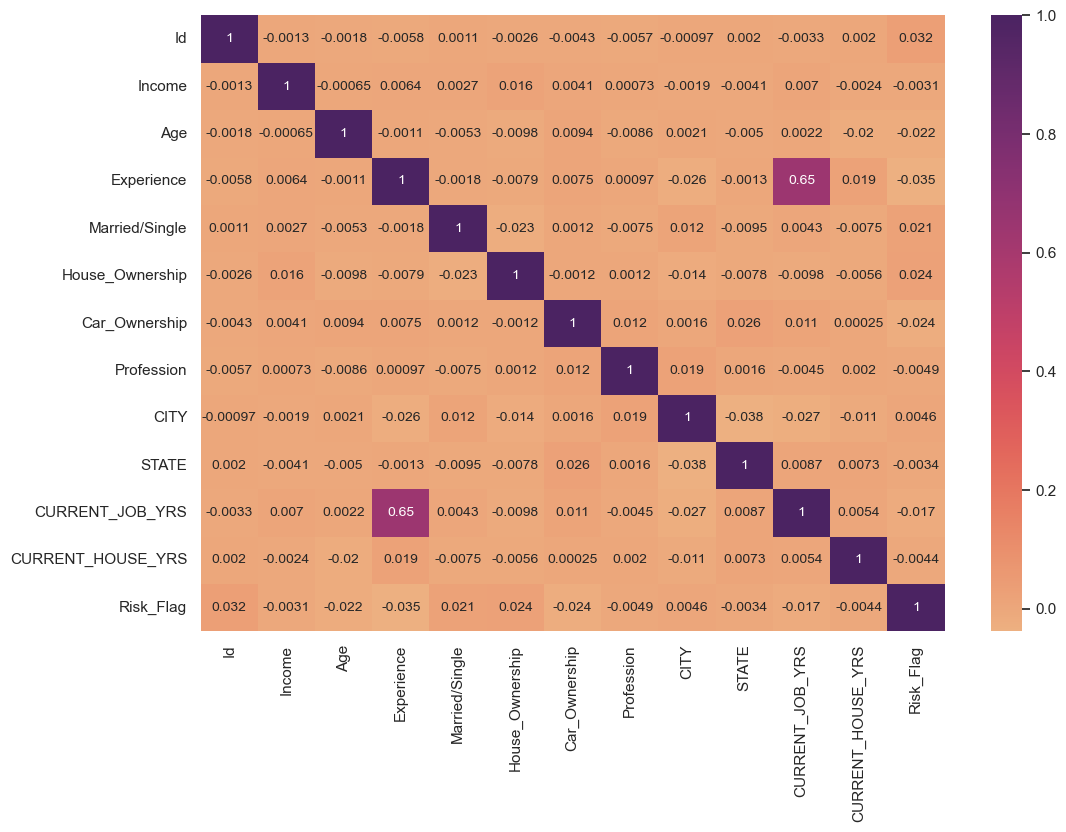

In [10]:
#plotting the correlation plot
fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = data.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 10})
plt.show()

In [11]:
#Analyzing categorical features
def categorical_valcount_hist(feature):
    print(data[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=data)
    plt.show()

Married/Single
1    226272
0     25728
Name: count, dtype: int64


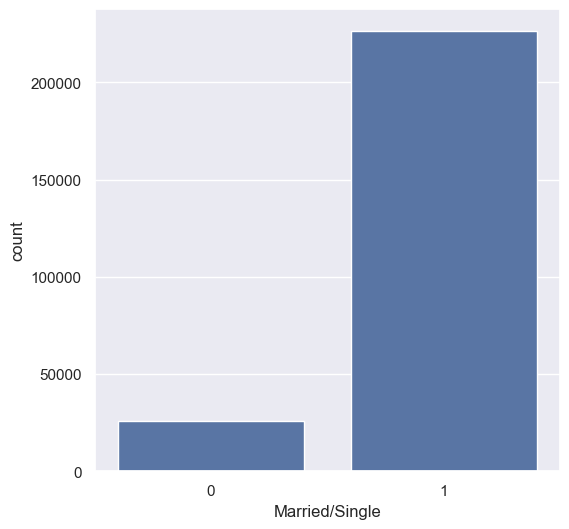

In [12]:
categorical_valcount_hist("Married/Single")

House_Ownership
2    231898
1     12918
0      7184
Name: count, dtype: int64


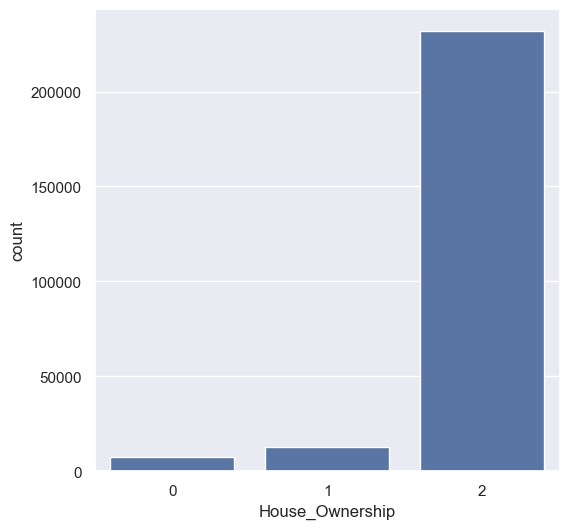

In [13]:
categorical_valcount_hist("House_Ownership")

In [14]:
print( "Total categories in STATE:", len( data["STATE"].unique() ) )
print()
print( data["STATE"].value_counts() )

Total categories in STATE: 29

STATE
25    28400
14    25562
0     25297
28    23483
2     19780
22    16537
13    14122
11    11855
6     11408
20     9174
10     8965
7      7890
23     7524
1      7062
12     5805
5      5490
19     4720
17     4658
4      3834
27     1874
9      1780
18     1433
16      849
15      849
8       833
24      809
26      743
3       656
21      608
Name: count, dtype: int64


In [15]:
print( "Total categories in Profession:", len( data["Profession"].unique() ) )
print()
data["Profession"].value_counts()

Total categories in Profession: 51



Profession
37    5957
44    5806
50    5397
40    5390
13    5372
19    5359
32    5357
22    5304
0     5281
12    5259
29    5250
33    5217
9     5205
47    5195
28    5178
23    5167
27    5166
25    5128
6     5127
42    5061
43    5053
36    5041
38    5035
14    4990
39    4944
34    4881
48    4864
4     4861
30    4818
15    4808
16    4782
41    4781
45    4772
5     4758
49    4737
17    4729
46    4714
26    4672
1     4668
3     4661
2     4657
8     4635
31    4628
10    4616
18    4598
20    4573
24    4507
7     4493
11    4413
35    4087
21    4048
Name: count, dtype: int64

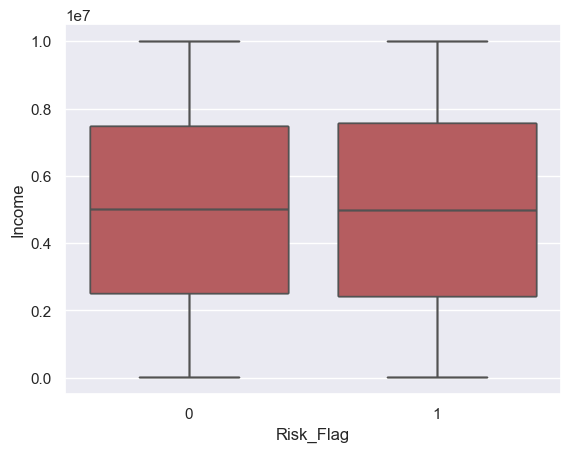

In [37]:
sns.boxplot(x ="Risk_Flag",y="Income" ,data = data)
plt.show()

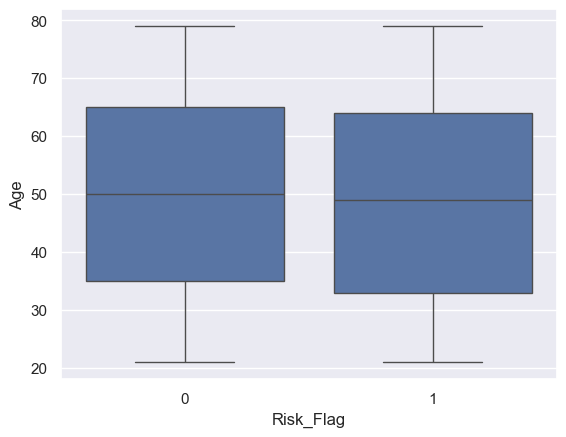

In [39]:
sns.boxplot(x ="Risk_Flag",y="Age" ,data = data)
plt.show()

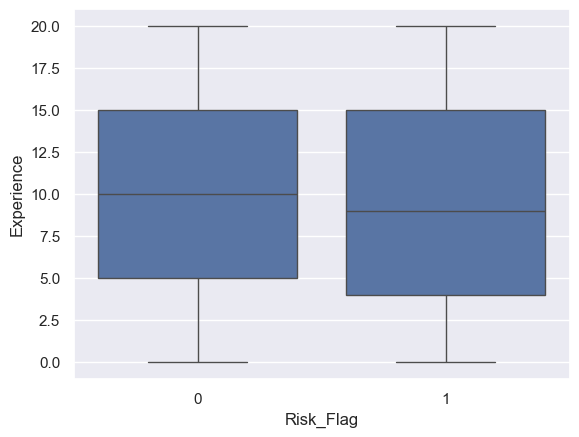

In [41]:
sns.boxplot(x ="Risk_Flag",y="Experience" ,data = data)
plt.show()

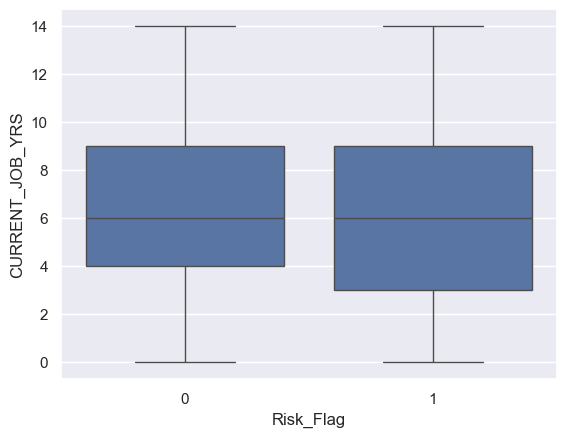

In [43]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_JOB_YRS" ,data = data)
plt.show()

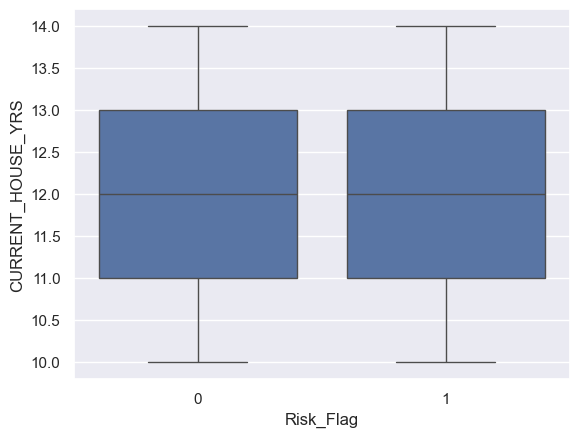

In [45]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_HOUSE_YRS" ,data = data)

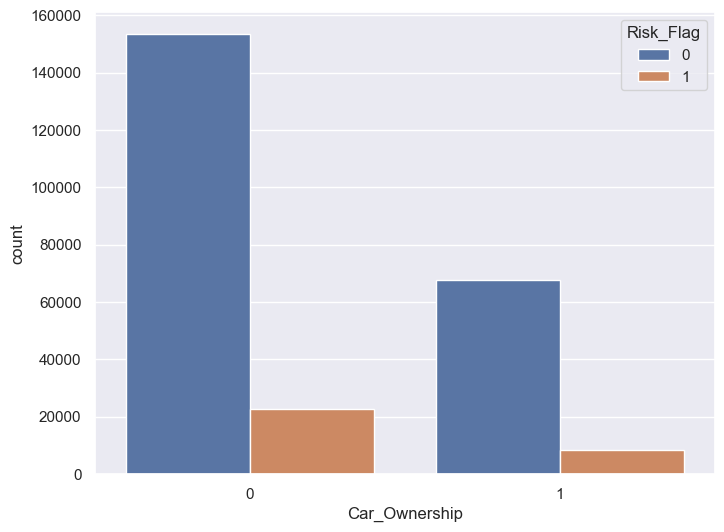

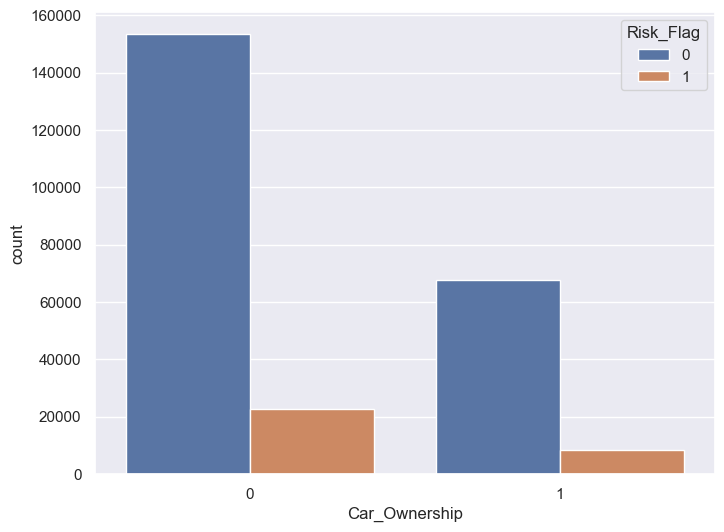

In [57]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='Car_Ownership', hue='Risk_Flag', ax=ax, data=data)
plt.show()

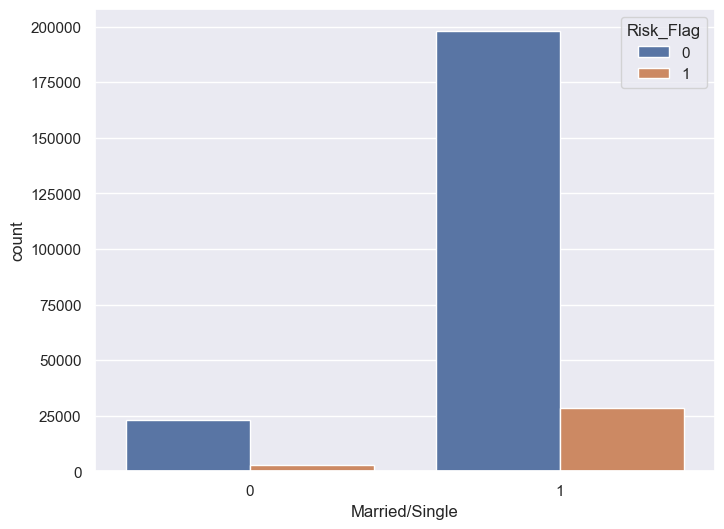

In [59]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='Married/Single', hue='Risk_Flag', data=data )
plt.show()

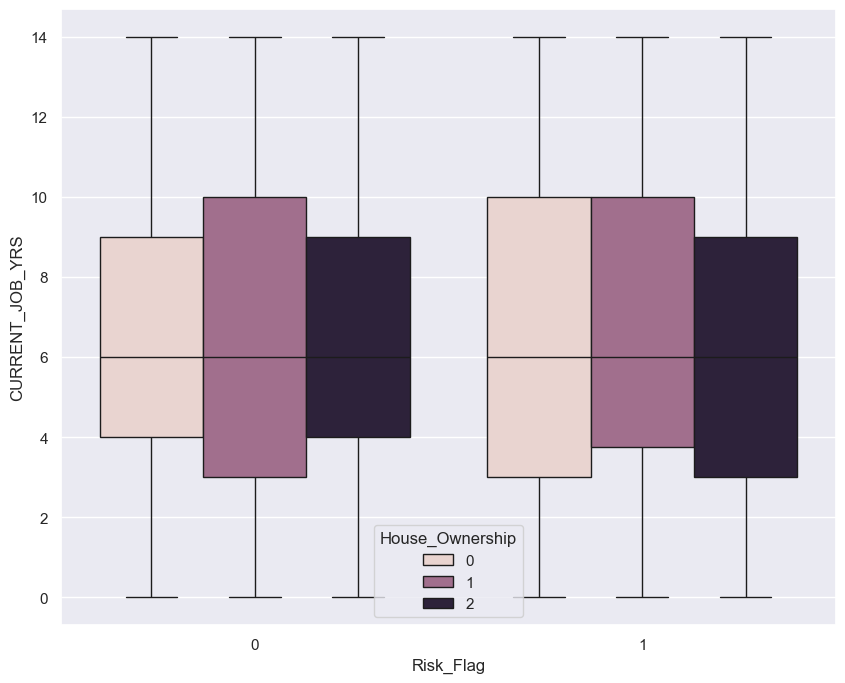

In [61]:
fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = "Risk_Flag", y = "CURRENT_JOB_YRS", hue='House_Ownership', data = data)
plt.show()

In [63]:
#Separating data into Train and test split
x = data.drop("Risk_Flag", axis=1)
y = data["Risk_Flag"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 7)

In [65]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)
smote_sampler = SMOTE(random_state=9)
pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', rf_clf]])
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

In [67]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 56.6059
Precision: 50.0356
F1-Score: 53.1184
Accuracy score: 87.7103
AUC Score: 74.3392
